In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

data = pd.read_csv('fifth-run/feats_version_5_22_acc.csv')
data = data[~data["activity"].str.contains("jogging")]
data["activity"] = data["activity"].replace(["sitting", "lying"], "resting")
result = data[data["name"].str.contains("kuba")]
result_train = data[data["name"].str.contains("kuba") == False]
result_train.drop('name', axis=1, inplace=True)
result.drop('name', axis=1, inplace=True)
X_train = result_train.iloc[:, :-1].values
y_train = result_train.iloc[:, -1].values
X_test = result.iloc[:, :-1].values
y_test = result.iloc[:, -1].values
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [6]:
label_encoder = LabelEncoder()
labels_train1 = label_encoder.fit_transform(y_train)
labels_val1 = label_encoder.transform(y_val)

Accuracy: 0.9421768707482994
Overall Classification Report:
               precision    recall  f1-score   support

  schodzenie       0.58      0.92      0.71        12
  odpoczynek       1.00      1.00      1.00       107
   przysiady       1.00      0.82      0.90        33
      stanie       1.00      1.00      1.00        36
  wchodzenie       0.83      0.33      0.48        15
   chodzenie       0.92      1.00      0.96        91

    accuracy                           0.94       294
   macro avg       0.89      0.84      0.84       294
weighted avg       0.95      0.94      0.94       294



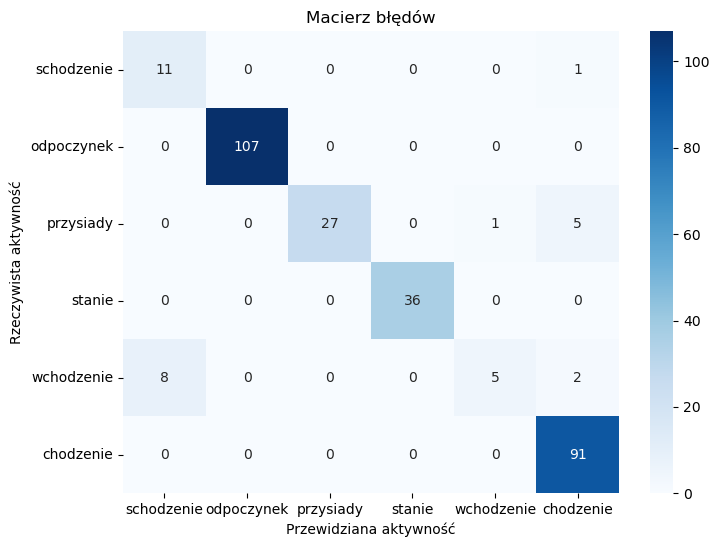

In [11]:
classifier = XGBClassifier(gamma=1.5, max_depth=5, min_child_weight=0.9, max_delta_step= 0.555, reg_lambda =3.5, reg_alpha = 0.7)
classifier.fit(X_train, labels_train1)
joblib.dump(classifier, 'XGBoost.h5')
y_pred = classifier.predict(X_val)

class_mapping = {
    0: "schodzenie",
    1: "odpoczynek",
    2: "przysiady",
    3: "stanie",
    4: "wchodzenie",
    5:  "chodzenie"  }

listt =[]
for key in class_mapping.values():
    listt.append(key)
    
print(f"Accuracy:",accuracy_score(labels_val1, y_pred))
print("Overall Classification Report:\n", classification_report(labels_val1, y_pred,target_names=listt))
confusion_mtx = confusion_matrix(labels_val1, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=listt, yticklabels=listt)
plt.xlabel('Przewidziana aktywność')
plt.ylabel('Rzeczywista aktywność')
plt.title('Macierz błędów')
plt.show()